In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('process_heart.csv')
X=df.drop('target',axis=1)
y=df['target']


#划分训练集和数据集
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#构架随机森林模型
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=5)

# 查看测试集

In [3]:
X_test.shape

(61, 26)

In [4]:
X_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_normal,exercise_induced_angina_1,exercise_induced_angina_no,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknow
246,56,134,409,150,1.9,2,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
183,58,112,230,165,2.5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
229,64,125,309,131,1.8,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
126,47,112,204,143,0.1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
184,50,150,243,128,2.6,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0


# 筛选出某一个未知样本

In [5]:
#挑出索引值为2的样本
X_test.iloc[2]

age                                           64.0
resting_blood_pressure                       125.0
cholesterol                                  309.0
max_heart_rate_achieved                      131.0
st_depression                                  1.8
num_major_vessels                              0.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                0.0
chest_pain_type_non-anginal pain               1.0
chest_pain_type_typical angina                 0.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_1                      1.0
exercise_induced_angina_no                     0.0
st_slope_downsloping           

In [6]:
test_sample=X_test.iloc[2]
test_sample.shape

(26,)

In [7]:
#转化为矩阵
test_sample=np.array(test_sample).reshape(1,-1)

In [8]:
test_sample

array([[ 64. , 125. , 309. , 131. ,   1.8,   0. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   1. ,   1. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ]])

In [9]:
test_sample.shape

(1, 26)

# 预测筛选出的单个未知样本

In [10]:
# 二分类定性分类结果
model.predict(test_sample)

array([0], dtype=int64)

In [12]:
#二分类定量分类结果
model.predict_proba(test_sample)

array([[0.62338459, 0.37661541]])

# 预测测试集上全部数据

In [15]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [16]:
model.predict_proba(X_test)

array([[0.90341673, 0.09658327],
       [0.65146111, 0.34853889],
       [0.62338459, 0.37661541],
       [0.23269383, 0.76730617],
       [0.70921534, 0.29078466],
       [0.26094227, 0.73905773],
       [0.38552409, 0.61447591],
       [0.30809576, 0.69190424],
       [0.09118795, 0.90881205],
       [0.84961624, 0.15038376],
       [0.05053297, 0.94946703],
       [0.8352881 , 0.1647119 ],
       [0.41842278, 0.58157722],
       [0.14237312, 0.85762688],
       [0.80799714, 0.19200286],
       [0.16244298, 0.83755702],
       [0.85266735, 0.14733265],
       [0.99465124, 0.00534876],
       [0.3577463 , 0.6422537 ],
       [0.78251753, 0.21748247],
       [0.94602969, 0.05397031],
       [0.15998159, 0.84001841],
       [0.32713839, 0.67286161],
       [0.15047025, 0.84952975],
       [0.66639429, 0.33360571],
       [0.83093808, 0.16906192],
       [0.98299287, 0.01700713],
       [0.91402804, 0.08597196],
       [0.06362005, 0.93637995],
       [0.99105795, 0.00894205],
       [0.

In [17]:
#每个样本模型预测它患心脏病的置信度
model.predict_proba(X_test)[:,1]

array([0.09658327, 0.34853889, 0.37661541, 0.76730617, 0.29078466,
       0.73905773, 0.61447591, 0.69190424, 0.90881205, 0.15038376,
       0.94946703, 0.1647119 , 0.58157722, 0.85762688, 0.19200286,
       0.83755702, 0.14733265, 0.00534876, 0.6422537 , 0.21748247,
       0.05397031, 0.84001841, 0.67286161, 0.84952975, 0.33360571,
       0.16906192, 0.01700713, 0.08597196, 0.93637995, 0.00894205,
       0.88259287, 0.22144779, 0.13248655, 0.239255  , 0.01086784,
       0.15102024, 0.78254475, 0.47799826, 0.83752573, 0.23052511,
       0.05459283, 0.24579854, 0.8381698 , 0.47594948, 0.91317222,
       0.41565467, 0.55691391, 0.83827165, 0.76533519, 0.31781531,
       0.51642864, 0.79624746, 0.03746243, 0.1343905 , 0.94325165,
       0.80906036, 0.81015064, 0.74362487, 0.01192906, 0.04612857,
       0.68257933])

In [18]:
#将定性与定量结果存储
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [20]:
#模型预测结果
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [21]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [22]:
#将测试结果与真实结果进行比较得到 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix_model=confusion_matrix(y_test,y_pred)

In [23]:
confusion_matrix_model

array([[28,  7],
       [ 4, 22]], dtype=int64)

In [33]:
#绘制混淆矩阵
import itertools
def cnf_matrix_plotter(cm,classes):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
    plt.title('confusion_matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    threshold=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white'if cm[i,j]> threshold else 'black',
                 fontsize=25)
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.show()

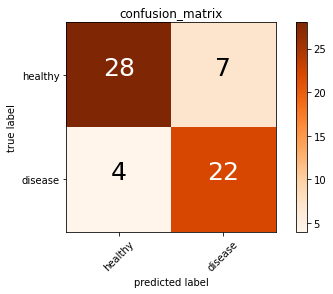

In [34]:
cnf_matrix_plotter(confusion_matrix_model,['healthy','disease'])
#每一行表示真实数据 每一列表示预测结果
#其中4表示真实得病但被模型预测为健康，数值较小，表明模型比较好

In [36]:
#计算各类的precision、recall、f1-score、support
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_pred,target_names=['healthy','disease']))

              precision    recall  f1-score   support

     healthy       0.88      0.80      0.84        35
     disease       0.76      0.85      0.80        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



# 对定量结果进行定量分析
## ROC曲线

In [37]:
model.predict_proba(X_test)

array([[0.90341673, 0.09658327],
       [0.65146111, 0.34853889],
       [0.62338459, 0.37661541],
       [0.23269383, 0.76730617],
       [0.70921534, 0.29078466],
       [0.26094227, 0.73905773],
       [0.38552409, 0.61447591],
       [0.30809576, 0.69190424],
       [0.09118795, 0.90881205],
       [0.84961624, 0.15038376],
       [0.05053297, 0.94946703],
       [0.8352881 , 0.1647119 ],
       [0.41842278, 0.58157722],
       [0.14237312, 0.85762688],
       [0.80799714, 0.19200286],
       [0.16244298, 0.83755702],
       [0.85266735, 0.14733265],
       [0.99465124, 0.00534876],
       [0.3577463 , 0.6422537 ],
       [0.78251753, 0.21748247],
       [0.94602969, 0.05397031],
       [0.15998159, 0.84001841],
       [0.32713839, 0.67286161],
       [0.15047025, 0.84952975],
       [0.66639429, 0.33360571],
       [0.83093808, 0.16906192],
       [0.98299287, 0.01700713],
       [0.91402804, 0.08597196],
       [0.06362005, 0.93637995],
       [0.99105795, 0.00894205],
       [0.

In [38]:
#每个样本模型预测它患心脏病的置信度
model.predict_proba(X_test)[:,1]

array([0.09658327, 0.34853889, 0.37661541, 0.76730617, 0.29078466,
       0.73905773, 0.61447591, 0.69190424, 0.90881205, 0.15038376,
       0.94946703, 0.1647119 , 0.58157722, 0.85762688, 0.19200286,
       0.83755702, 0.14733265, 0.00534876, 0.6422537 , 0.21748247,
       0.05397031, 0.84001841, 0.67286161, 0.84952975, 0.33360571,
       0.16906192, 0.01700713, 0.08597196, 0.93637995, 0.00894205,
       0.88259287, 0.22144779, 0.13248655, 0.239255  , 0.01086784,
       0.15102024, 0.78254475, 0.47799826, 0.83752573, 0.23052511,
       0.05459283, 0.24579854, 0.8381698 , 0.47594948, 0.91317222,
       0.41565467, 0.55691391, 0.83827165, 0.76533519, 0.31781531,
       0.51642864, 0.79624746, 0.03746243, 0.1343905 , 0.94325165,
       0.80906036, 0.81015064, 0.74362487, 0.01192906, 0.04612857,
       0.68257933])

In [39]:
y_pred_quant=model.predict_proba(X_test)[:,1]

In [40]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,y_pred_quant)

In [41]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.11428571, 0.11428571, 0.37142857, 0.37142857, 0.42857143,
       0.42857143, 0.45714286, 0.45714286, 0.8       , 0.8       ,
       1.        ])

In [42]:
tpr

array([0.        , 0.03846154, 0.5       , 0.5       , 0.76923077,
       0.76923077, 0.84615385, 0.84615385, 0.88461538, 0.88461538,
       0.92307692, 0.92307692, 0.96153846, 0.96153846, 1.        ,
       1.        ])

In [43]:
thresholds

array([1.94946703, 0.94946703, 0.83752573, 0.81015064, 0.73905773,
       0.67286161, 0.61447591, 0.33360571, 0.31781531, 0.24579854,
       0.239255  , 0.23052511, 0.22144779, 0.05459283, 0.05397031,
       0.00534876])

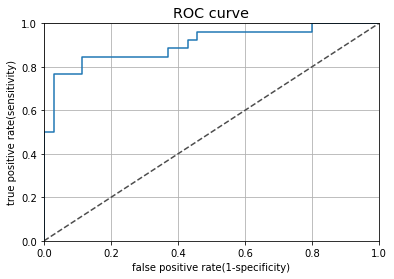

In [44]:
#绘制roc曲线
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('ROC curve')
plt.xlabel('false positive rate(1-specificity)')
plt.ylabel('true positive rate(sensitivity)')
plt.grid(True)
           

In [45]:
auc(fpr,tpr)

0.9043956043956045